In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [114]:
from datetime import datetime


class App_Logger:
    def __init__(self):
        pass

    def log(self, file_object, log_message):
        self.now = datetime.now()
        self.date = self.now.date()
        self.current_time = self.now.strftime("%H:%M:%S")
        file_object.write(str(self.date) + "/" + str(self.current_time) + "\t\t" + log_message +"\n")

In [115]:
# Load the data
data = pd.read_csv('hypothyroid.csv')
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [116]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'binaryClass'],
      dtype='object')

In [117]:
# Display first few rows
print(data.head(10))
data

  age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   
5  18   F            t                  f                         f    f   
6  59   F            f                  f                         f    f   
7  80   F            f                  f                         f    f   
8  66   F            f                  f                         f    f   
9  68   M            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,...,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,...,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,...,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,...,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,...,t,61,t,0.87,t,70,f,?,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,?,f,?,f,?,f,?,other,P
3768,68,F,f,f,f,f,f,f,f,f,...,t,124,t,1.08,t,114,f,?,SVI,P
3769,74,F,f,f,f,f,f,f,f,f,...,t,112,t,1.07,t,105,f,?,other,P
3770,72,M,f,f,f,f,f,f,f,f,...,t,82,t,0.94,t,87,f,?,SVI,P


In [118]:
data.shape

(3772, 30)

In [119]:
# Print the count of null values for each column
print(data.isnull().sum())


age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64


In [120]:
# Encode the target variable (binaryClass)and relevant variables 
data['binaryClass'] = data['binaryClass'].map({'P': 1, 'N': 0})
data['pregnant'] = data['pregnant'].map({'t': 1, 'f': 0})
data['I131 treatment'] = data['I131 treatment'].map({'t': 1, 'f': 0})
data['thyroid surgery'] = data['thyroid surgery'].map({'t': 1, 'f': 0})
data['on antithyroid medication'] = data['on antithyroid medication'].map({'t': 1, 'f': 0})
data['on thyroxine'] = data['on thyroxine'].map({'t': 1, 'f': 0})
data['goitre'] = data['goitre'].map({'t': 1, 'f': 0})
data['TSH measured']=data['TSH measured'].map({'t':1,'f':0})
data['TT4 measured']=data['TT4 measured'].map({'t':1,'f':0})
data['T4U measured']=data['T4U measured'].map({'t':1,'f':0})
data['FTI measured']=data['FTI measured'].map({'t':1,'f':0})
data['T3 measured']=data['T3 measured'].map({'t':1,'f':0})


In [121]:
data.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,f,0,f,0,0,0,f,...,1,125,1,1.14,1,109,f,?,SVHC,1
1,23,F,0,f,0,f,0,0,0,f,...,1,102,0,?,0,?,f,?,other,1
2,46,M,0,f,0,f,0,0,0,f,...,1,109,1,0.91,1,120,f,?,other,1
3,70,F,1,f,0,f,0,0,0,f,...,1,175,0,?,0,?,f,?,other,1
4,70,F,0,f,0,f,0,0,0,f,...,1,61,1,0.87,1,70,f,?,SVI,1


In [122]:
data.isin(['?']).any().sum()

8

In [123]:
# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

In [124]:
data.isin(['?']).any().sum()

0

In [125]:
nul=data.isna().sum()
nul

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

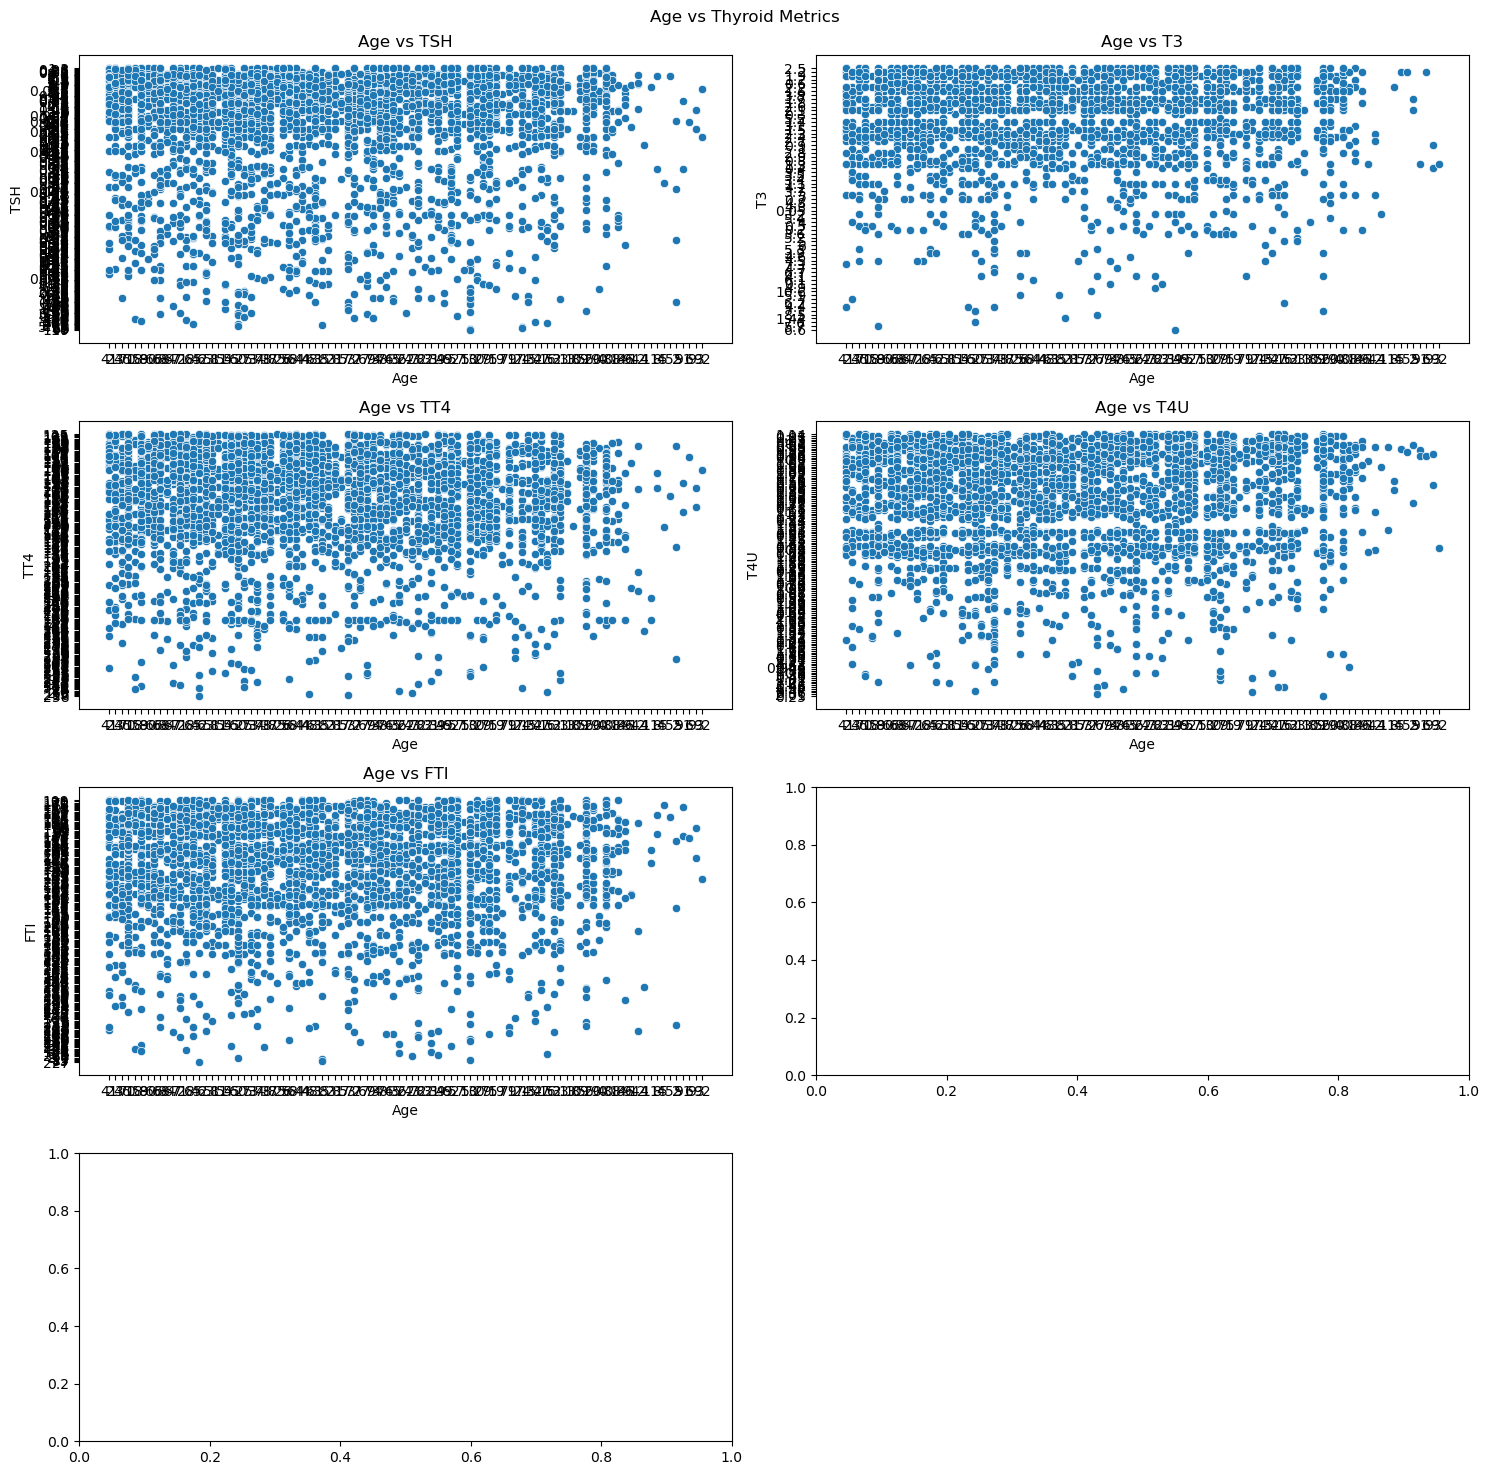

In [126]:

df = pd.DataFrame(data)

# Setting up the figure and axes
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Age vs Thyroid Metrics')

# Flattening the axes array for easier iteration
axs = axs.flatten()

# List of columns to plot
metrics = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Creating scatter plots
for i, metric in enumerate(metrics):
    sns.scatterplot(x='age', y=metric, data=df, ax=axs[i])
    axs[i].set_title(f'Age vs {metric}')
    axs[i].set_xlabel('Age')
    axs[i].set_ylabel(metric)

# Hide the last subplot (bottom-right corner)
fig.delaxes(axs[-1])
# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()


In [127]:

# Fill missing values for selected columns with median
selected_columns = ['TSH','T3','TT4', 'T4U', 'FTI']  
data[selected_columns] = data[selected_columns].fillna(data[selected_columns].median())

data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,f,0,f,0,0,0,f,...,1,125,1,1.14,1,109,f,NaN,SVHC,1
1,23,F,0,f,0,f,0,0,0,f,...,1,102,0,0.98,0,107.0,f,NaN,other,1
2,46,M,0,f,0,f,0,0,0,f,...,1,109,1,0.91,1,120,f,NaN,other,1
3,70,F,1,f,0,f,0,0,0,f,...,1,175,0,0.98,0,107.0,f,NaN,other,1
4,70,F,0,f,0,f,0,0,0,f,...,1,61,1,0.87,1,70,f,NaN,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,f,0,f,0,0,0,f,...,0,103.0,0,0.98,0,107.0,f,NaN,other,1
3768,68,F,0,f,0,f,0,0,0,f,...,1,124,1,1.08,1,114,f,NaN,SVI,1
3769,74,F,0,f,0,f,0,0,0,f,...,1,112,1,1.07,1,105,f,NaN,other,1
3770,72,M,0,f,0,f,0,0,0,f,...,1,82,1,0.94,1,87,f,NaN,SVI,1


In [128]:

# Summary statistics
print(data.describe())

# Data types and missing values
print(data.info())
data.isnull

       on thyroxine  on antithyroid medication     pregnant  thyroid surgery  \
count   3772.000000                3772.000000  3772.000000      3772.000000   
mean       0.123012                   0.011400     0.014051         0.014051   
std        0.328494                   0.106174     0.117716         0.117716   
min        0.000000                   0.000000     0.000000         0.000000   
25%        0.000000                   0.000000     0.000000         0.000000   
50%        0.000000                   0.000000     0.000000         0.000000   
75%        0.000000                   0.000000     0.000000         0.000000   
max        1.000000                   1.000000     1.000000         1.000000   

       I131 treatment       goitre  TSH measured  T3 measured  TT4 measured  \
count     3772.000000  3772.000000   3772.000000  3772.000000   3772.000000   
mean         0.015642     0.009014      0.902174     0.796129      0.938759   
std          0.124101     0.094525      0.

<bound method DataFrame.isnull of      age sex  on thyroxine query on thyroxine  on antithyroid medication sick  \
0     41   F             0                  f                          0    f   
1     23   F             0                  f                          0    f   
2     46   M             0                  f                          0    f   
3     70   F             1                  f                          0    f   
4     70   F             0                  f                          0    f   
...   ..  ..           ...                ...                        ...  ...   
3767  30   F             0                  f                          0    f   
3768  68   F             0                  f                          0    f   
3769  74   F             0                  f                          0    f   
3770  72   M             0                  f                          0    f   
3771  64   F             0                  f                          0   

In [129]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,f,0,f,0,0,0,f,...,1,125,1,1.14,1,109,f,NaN,SVHC,1
1,23,F,0,f,0,f,0,0,0,f,...,1,102,0,0.98,0,107.0,f,NaN,other,1
2,46,M,0,f,0,f,0,0,0,f,...,1,109,1,0.91,1,120,f,NaN,other,1
3,70,F,1,f,0,f,0,0,0,f,...,1,175,0,0.98,0,107.0,f,NaN,other,1
4,70,F,0,f,0,f,0,0,0,f,...,1,61,1,0.87,1,70,f,NaN,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,f,0,f,0,0,0,f,...,0,103.0,0,0.98,0,107.0,f,NaN,other,1
3768,68,F,0,f,0,f,0,0,0,f,...,1,124,1,1.08,1,114,f,NaN,SVI,1
3769,74,F,0,f,0,f,0,0,0,f,...,1,112,1,1.07,1,105,f,NaN,other,1
3770,72,M,0,f,0,f,0,0,0,f,...,1,82,1,0.94,1,87,f,NaN,SVI,1


In [130]:
# Check if '?' is in the 'binaryClass' column
contains_question_mark = data.isin(['?']).any().sum()
contains_question_mark


0

In [131]:
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,f,0,f,0,0,0,f,...,1,125,1,1.14,1,109,f,NaN,SVHC,1
1,23,F,0,f,0,f,0,0,0,f,...,1,102,0,0.98,0,107.0,f,NaN,other,1
2,46,M,0,f,0,f,0,0,0,f,...,1,109,1,0.91,1,120,f,NaN,other,1
3,70,F,1,f,0,f,0,0,0,f,...,1,175,0,0.98,0,107.0,f,NaN,other,1
4,70,F,0,f,0,f,0,0,0,f,...,1,61,1,0.87,1,70,f,NaN,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,f,0,f,0,0,0,f,...,0,103.0,0,0.98,0,107.0,f,NaN,other,1
3768,68,F,0,f,0,f,0,0,0,f,...,1,124,1,1.08,1,114,f,NaN,SVI,1
3769,74,F,0,f,0,f,0,0,0,f,...,1,112,1,1.07,1,105,f,NaN,other,1
3770,72,M,0,f,0,f,0,0,0,f,...,1,82,1,0.94,1,87,f,NaN,SVI,1


In [132]:
import pandas as pd
data=pd.DataFrame(data)
data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,0,f,0,f,0,0,0,f,...,1,125,1,1.14,1,109,f,NaN,SVHC,1
1,23,F,0,f,0,f,0,0,0,f,...,1,102,0,0.98,0,107.0,f,NaN,other,1
2,46,M,0,f,0,f,0,0,0,f,...,1,109,1,0.91,1,120,f,NaN,other,1
3,70,F,1,f,0,f,0,0,0,f,...,1,175,0,0.98,0,107.0,f,NaN,other,1
4,70,F,0,f,0,f,0,0,0,f,...,1,61,1,0.87,1,70,f,NaN,SVI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,0,f,0,f,0,0,0,f,...,0,103.0,0,0.98,0,107.0,f,NaN,other,1
3768,68,F,0,f,0,f,0,0,0,f,...,1,124,1,1.08,1,114,f,NaN,SVI,1
3769,74,F,0,f,0,f,0,0,0,f,...,1,112,1,1.07,1,105,f,NaN,other,1
3770,72,M,0,f,0,f,0,0,0,f,...,1,82,1,0.94,1,87,f,NaN,SVI,1


In [133]:
#dropping irrelevant columns from data
columns_to_drop =["age","sex","query on thyroxine","sick","query hypothyroid","query hyperthyroid","lithium","tumor","hypopituitary","psych",'TBG measured','TBG','referral source' ]
data2=data.drop(columns=columns_to_drop)
data2

,on thyroxine,on antithyroid medication,pregnant,thyroid surgery,I131 treatment,goitre,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,0,0,0,0,0,0,1,1.3,1,2.5,1,125,1,1.14,1,109,1
1,0,0,0,0,0,0,1,4.1,1,2,1,102,0,0.98,0,107.0,1
2,0,0,0,0,0,0,1,0.98,0,2.0,1,109,1,0.91,1,120,1
3,1,0,0,0,0,0,1,0.16,1,1.9,1,175,0,0.98,0,107.0,1
4,0,0,0,0,0,0,1,0.72,1,1.2,1,61,1,0.87,1,70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,0,0,0,0,0,0,0,1.4,0,2.0,0,103.0,0,0.98,0,107.0,1
3768,0,0,0,0,0,0,1,1,1,2.1,1,124,1,1.08,1,114,1
3769,0,0,0,0,0,0,1,5.1,1,1.8,1,112,1,1.07,1,105,1
3770,0,0,0,0,0,0,1,0.7,1,2,1,82,1,0.94,1,87,1


In [134]:
data2_corr=data2.corr()
data2_corr

,on thyroxine,on antithyroid medication,pregnant,thyroid surgery,I131 treatment,goitre,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
on thyroxine,1.000000,-0.002201,0.010152,0.037583,0.063373,-0.010098,0.041818,0.019084,-0.145061,0.005416,0.024964,0.213578,0.038852,0.047309,0.038285,0.186926,0.081060
on antithyroid medication,-0.002201,1.000000,0.072050,-0.012819,0.006589,-0.010241,0.001736,-0.010574,0.010950,0.079291,-0.024649,0.022883,-0.029532,0.059621,-0.029788,-0.017591,0.021689
pregnant,0.010152,0.072050,1.000000,-0.014251,-0.015048,0.012447,0.001401,-0.019606,0.026865,0.181340,0.021097,0.173152,0.032942,0.335411,0.032808,-0.015590,0.034516
thyroid surgery,0.037583,-0.012819,-0.014251,1.000000,0.003104,-0.011385,0.039310,0.028048,-0.023453,-0.024318,0.030491,-0.020665,0.010672,0.028176,0.010488,-0.031459,0.017633
I131 treatment,0.063373,0.006589,-0.015048,0.003104,1.000000,-0.012022,0.041509,-0.002171,0.000150,0.012057,0.032196,-0.007652,0.028540,0.010104,0.028385,-0.015857,-0.003590
goitre,-0.010098,-0.010241,0.012447,-0.011385,-0.012022,1.000000,-0.063016,-0.014313,-0.035289,0.011531,-0.010737,-0.019324,0.004514,0.035177,0.004358,-0.039697,0.027575
TSH measured,0.041818,0.001736,0.001401,0.039310,0.041509,-0.063016,1.000000,0.046980,0.444723,-0.035462,0.671429,0.028534,0.506265,0.024465,0.508005,0.016859,-0.095209
TSH,0.019084,-0.010574,-0.019606,0.028048,-0.002171,-0.014313,0.046980,1.000000,0.028334,-0.148776,0.030603,-0.259527,0.017811,0.071931,0.017585,-0.291953,-0.427963
T3 measured,-0.145061,0.010950,0.026865,-0.023453,0.000150,-0.035289,0.444723,0.028334,1.000000,0.007368,0.416904,-0.023697,0.262632,0.013366,0.264122,-0.032939,-0.032866
T3,0.005416,0.079291,0.181340,-0.024318,0.012057,0.011531,-0.035462,-0.148776,0.007368,1.000000,-0.004819,0.508237,0.003621,0.407247,0.002773,0.308441,0.177436


In [135]:
data2.head()

,on thyroxine,on antithyroid medication,pregnant,thyroid surgery,I131 treatment,goitre,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,binaryClass
0,0,0,0,0,0,0,1,1.3,1,2.5,1,125,1,1.14,1,109,1
1,0,0,0,0,0,0,1,4.1,1,2,1,102,0,0.98,0,107.0,1
2,0,0,0,0,0,0,1,0.98,0,2.0,1,109,1,0.91,1,120,1
3,1,0,0,0,0,0,1,0.16,1,1.9,1,175,0,0.98,0,107.0,1
4,0,0,0,0,0,0,1,0.72,1,1.2,1,61,1,0.87,1,70,1


<Axes: >

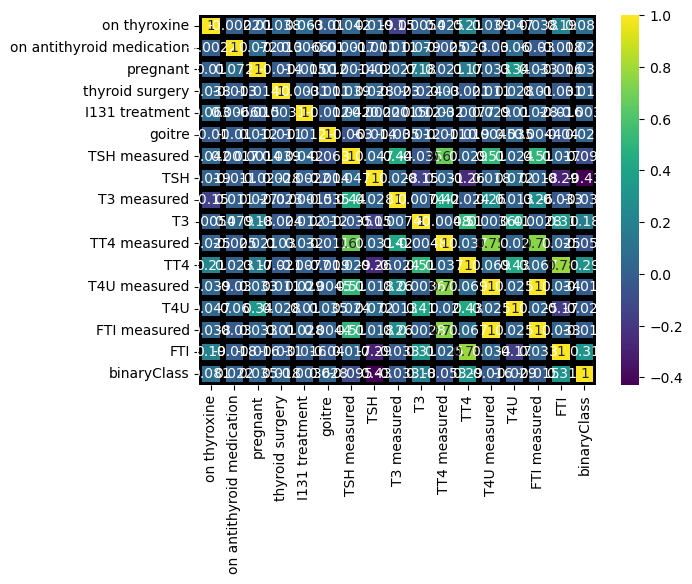

In [136]:
sns.heatmap(data2_corr, cmap='viridis', linecolor='k', linewidths=4, annot=True)

In [137]:
# Split the data
X = data2.drop('binaryClass', axis=1)
y = data2['binaryClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model building and testing

In [139]:
# Train different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'k-NN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'{name} Accuracy: {accuracy}')
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print('-'*50)


Logistic Regression Accuracy: 0.9668874172185431
              precision    recall  f1-score   support

           0       0.97      0.59      0.73        58
           1       0.97      1.00      0.98       697

    accuracy                           0.97       755
   macro avg       0.97      0.79      0.86       755
weighted avg       0.97      0.97      0.96       755

[[ 34  24]
 [  1 696]]
--------------------------------------------------
Random Forest Accuracy: 0.9986754966887417
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      1.00      1.00       697

    accuracy                           1.00       755
   macro avg       0.99      1.00      1.00       755
weighted avg       1.00      1.00      1.00       755

[[ 58   0]
 [  1 696]]
--------------------------------------------------
SVM Accuracy: 0.9562913907284768
              precision    recall  f1-score   support

           0      

Model Deployment (Flask API)


In [140]:
# Choose the best model (RandomForest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [142]:
data2.columns

Index(['on thyroxine', 'on antithyroid medication', 'pregnant',
       'thyroid surgery', 'I131 treatment', 'goitre', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

In [148]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data2 = request.get_json()  # Get the JSON data from the request
    feature1 = data2.get('FTI measured')
    feature2 = data2.get('T3 measured')
    # Add more features as needed
    
    # Perform prediction logic here
    # For example, you might have a model to make predictions
    result = {"prediction": "dummy_result"}  # Replace with actual prediction logic
    
    return jsonify(result)

#if __name__ == '__main__':
    app.run()
